Penerapan Metode CNN Residual Network (ResNet) 50 untuk Mengklasifikasi Daun Tanaman Herbal 

Anggota :

1.   Alan Hokgie Wijaya - 202010370311248
2.   Mochammad Uridho Akbar Firmansyah - 202010370311256
3.   Sartika - 0910580520012





In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

import os

folder_path = '/content/gdrive/My Drive/Dataset'
for dirname, _, filenames in os.walk(folder_path):
    print(dirname)

/content/gdrive/My Drive/Dataset
/content/gdrive/My Drive/Dataset/Jambu Biji
/content/gdrive/My Drive/Dataset/Belimbing Wuluh
/content/gdrive/My Drive/Dataset/Nangka
/content/gdrive/My Drive/Dataset/Kemangi
/content/gdrive/My Drive/Dataset/Lidah Buaya
/content/gdrive/My Drive/Dataset/Pepaya
/content/gdrive/My Drive/Dataset/Pandan
/content/gdrive/My Drive/Dataset/Sirih
/content/gdrive/My Drive/Dataset/Seledri
/content/gdrive/My Drive/Dataset/Jeruk Nipis


In [4]:
print('Total Jambu Biji images:', len(os.listdir(folder_path + '/Jambu Biji')))
print('Total Belimbing Wuluh images:', len(os.listdir(folder_path + '/Belimbing Wuluh')))
print('Total Nangka images:', len(os.listdir(folder_path + '/Nangka')))
print('Total Kemangi images:', len(os.listdir(folder_path + '/Kemangi')))
print('Total Lidah Buaya images:', len(os.listdir(folder_path + '/Lidah Buaya')))
print('Total Pepaya images:', len(os.listdir(folder_path + '/Pepaya')))
print('Total Pandan images:', len(os.listdir(folder_path + '/Pandan')))
print('Total Sirih images:', len(os.listdir(folder_path + '/Sirih')))
print('Total Seledri images:', len(os.listdir(folder_path + '/Seledri')))
print('Total Jeruk Nipis images:', len(os.listdir(folder_path + '/Jeruk Nipis')))

Total Jambu Biji images: 350
Total Belimbing Wuluh images: 350
Total Nangka images: 350
Total Kemangi images: 350
Total Lidah Buaya images: 350
Total Pepaya images: 350
Total Pandan images: 350
Total Sirih images: 350
Total Seledri images: 350
Total Jeruk Nipis images: 350


In [8]:
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Text(0.5, 1.0, 'Fourth')

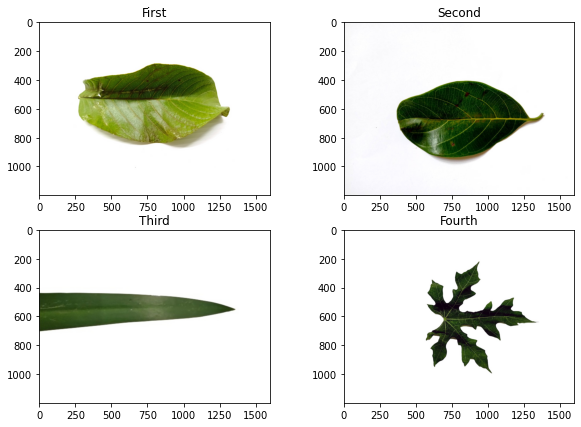

In [10]:
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = load_img(folder_path + '/Jambu Biji/Jambu Biji002.jpg')
Image2 = load_img(folder_path + '/Nangka/Nangka004.jpg')
Image3 = load_img(folder_path + '/Pandan/Pandan006.jpg')
Image4 = load_img(folder_path + '/Pepaya/Pepaya020.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

In [11]:
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest',
                validation_split=0.2
)

In [12]:
train_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)
validation_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

Found 2800 images belonging to 10 classes.
Found 700 images belonging to 10 classes.


In [16]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108,108,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          1179712   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [17]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=5,
                    verbose=1,
                    )

Epoch 1/5
88/88 [==============================] - 955s 11s/step - loss: 1.3898 - accuracy: 0.5786 - val_loss: 1.0052 - val_accuracy: 0.6443
Epoch 2/5
88/88 [==============================] - 244s 3s/step - loss: 0.6374 - accuracy: 0.7900 - val_loss: 0.7681 - val_accuracy: 0.7743
Epoch 3/5
88/88 [==============================] - 275s 3s/step - loss: 0.3702 - accuracy: 0.8800 - val_loss: 0.9638 - val_accuracy: 0.7271
Epoch 4/5
88/88 [==============================] - 245s 3s/step - loss: 0.2774 - accuracy: 0.9132 - val_loss: 0.8942 - val_accuracy: 0.7971
Epoch 5/5
88/88 [==============================] - 282s 3s/step - loss: 0.2158 - accuracy: 0.9339 - val_loss: 0.7014 - val_accuracy: 0.8143


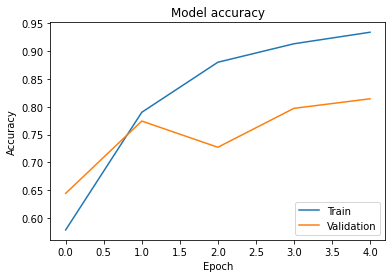

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

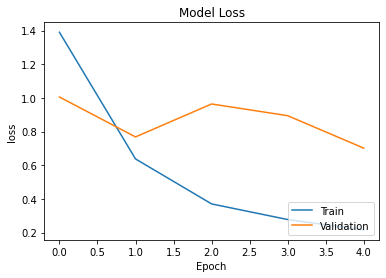

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [23]:
model.save('/content/gdrive/My Drive/Dataset/savemodel.h5')
